<img src="https://images.unsplash.com/photo-1540189549336-e6e99c3679fe?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80"
    style="width:200; float: left; margin: 0 40px 40px 40px;"></img>

## <center>Now you can get the list of all the nutrients in your food</center>
## <center>just by inserting ingredients</center>
<br>
<br>

## <center>Check it out!</center>

## Import Libraries

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

## Add Ingredients in your food with its units

In [2]:
ingredients = (input('Enter ingredients with its unit. Such as 100ml milk, 40g bread etc.'))

Enter ingredients with its unit. Such as 100ml milk, 40g bread etc.200g tuna, 200ml water, 40g bread


#### I mostly consume tuna, water and bread combination. As an example I added those as an ingredients. But you can add anything you want

## Exporting data from API and making it in a structured form

In [3]:
def get_nutrients(ingredients):
    api_key = 'e109e1ac122ce462cd08ef2b1477f786'
    api_id = 'da7e6685'
    api_endpint = 'https://api.edamam.com/api/nutrition-details'
    url = api_endpint + '?app_id=' + api_id +'&app_key=' + api_key
    headers = {
        'Content-Type':'application/json'}
    receipe = {
        'title': 'Something',
        'ingr' : [ingredients]}
    r = requests.post(url,headers = headers, json = receipe)
    if r.ok == True:
        df = pd.DataFrame(r.json()['totalNutrients']).transpose()
        return df
    else:
        print('Ops! It seems there is typing mistake in your ingredients! Check example provided above!')

In [4]:
get_nutrients(ingredients)

,label,quantity,unit
ENERC_KCAL,Energy,534.0,kcal
FAT,Total lipid (fat),6.48,g
FASAT,"Fatty acids, total saturated",1.554,g
FATRN,"Fatty acids, total trans",0.052,g
FAMS,"Fatty acids, total monounsaturated",1.214,g
FAPU,"Fatty acids, total polyunsaturated",2.998,g
CHOCDF,"Carbohydrate, by difference",97.36,g
FIBTG,"Fiber, total dietary",8.0,g
SUGAR,"Sugars, total",11.82,g
PROCNT,Protein,21.44,g


## Absorbed vitamins

In [5]:
df = get_nutrients(ingredients)

Text(0, 0.5, 'Quantity')

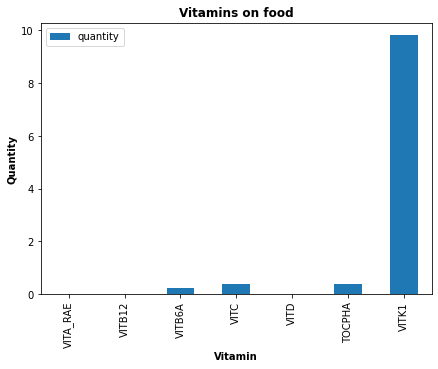

In [6]:
df.filter(items = ['VITA_RAE','VITB12','VITB6A','VITC','VITD','TOCPHA','VITK1'], axis=0).plot(kind = 'bar', figsize = (7,5))
plt.title('Vitamins on food', fontweight='bold')
plt.xlabel('Vitamin', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')

## Absorbed minerals

Text(0, 0.5, 'Quantity')

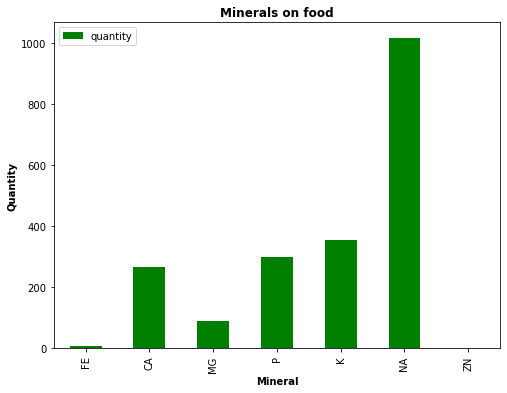

In [7]:
df.filter(items = ['FE','CA','MG','P','K','NA','ZN'], axis=0).plot(kind = 'bar', figsize = (8,6), color = 'green')
plt.title('Minerals on food', fontweight='bold')
plt.xlabel('Mineral', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')